In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
def plot_hist(df, col, quantile, title, filename):
    plt.figure()
    df = df[col]
    mean = df.mean()
    median = df.median()
    df = df[df < df.quantile(quantile)]
    df.hist(bins=min(100, len(df.unique())), label="count", align='left', rwidth=1)
#     plt.xticks(np.arange(0, df.max()+1, 1))
    plt.axvline(mean, color="red", linestyle='dashed', label=f"mean = {mean:.2f}")
    plt.axvline(median, color="orange", linestyle='dashed', label=f"median = {median:.2f}")
    plt.legend()
#     plt.title(f"{title}: {col} (quantile={quantile})")
    plt.title(f"{title} ({col})")
    plt.savefig(f'{filename}.pdf') 

In [29]:
def plot_hist_simple_title(df, col, quantile, title, filename):
    plt.figure()
    df = df[col]
    mean = df.mean()
    median = df.median()
    df = df[df < df.quantile(quantile)]
    df.hist(bins=min(100, len(df.unique())), label="count", align='left', rwidth=1)
#     plt.xticks(np.arange(0, df.max()+1, 1))
    plt.axvline(mean, color="red", linestyle='dashed', label=f"mean = {mean:.2f}")
    plt.axvline(median, color="orange", linestyle='dashed', label=f"median = {median:.2f}")
    plt.legend()
#     plt.title(f"{title} (quantile={quantile})") if quantile != 1 else plt.title(f"{title}")
    plt.title(f"{title} ({col})")
    plt.savefig(f'{filename}.pdf') 

In [28]:
def plot_hist_xticks(df, col, quantile, title, filename):
    plt.figure()
    df = df[col]
    mean = df.mean()
    median = df.median()
    df = df[df < df.quantile(quantile)]
    df.hist(bins=min(100, len(df.unique())), label="count", align='left', rwidth=1)
    plt.xticks(np.arange(0, df.max()+1, 1))
    plt.axvline(mean, color="red", linestyle='dashed', label=f"mean = {mean:.2f}")
    plt.axvline(median, color="orange", linestyle='dashed', label=f"median = {median:.2f}")
    plt.legend()
#     plt.title(f"{title}: {col} (quantile={quantile})")
    plt.title(f"{title} ({col})")
    plt.savefig(f'{filename}.pdf') 

# Number of tactic tokens by proof

In [5]:
counts_by_proof = pd.read_csv("counts_proofs.csv")
tfidf_by_proof = pd.read_csv("tfidf_proofs.csv")

In [6]:
print(len(counts_by_proof))
counts_by_proof.head()

7059


,y_gsmax,y_astactic,proof_name,lib_name,project_name,0b,10,_1,_2,_a_equiv,...,zplus_eq_compat,zplus_le_compat_r,zplus_minus,zplus_minus_eq,zplus_opp_l,zpos_eq_z_of_nat_o_nat_of_p,zpred,zrv_wr,zsucc_inj,zx
0,0.0,0.0,subRelGRBar,Bar.json,buchberger,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,pmon2,Monomials.json,buchberger,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,recomp_ok,Monomials.json,buchberger,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,zero_mon,Monomials.json,buchberger,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,mult_mon_zero_r,Monomials.json,buchberger,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
init_cols = counts_by_proof.columns[:5].tolist()
init_cols

['y_gsmax', 'y_astactic', 'proof_name', 'lib_name', 'project_name']

In [8]:
counts_by_proof['num_tokens'] = counts_by_proof.drop(init_cols, axis=1).sum(axis=1)
max(counts_by_proof['num_tokens'])

1226

In [9]:
df = counts_by_proof[init_cols+['num_tokens']]
df.head()

,y_gsmax,y_astactic,proof_name,lib_name,project_name,num_tokens
0,0.0,0.0,subRelGRBar,Bar.json,buchberger,2
1,1.0,1.0,pmon2,Monomials.json,buchberger,2
2,1.0,0.0,recomp_ok,Monomials.json,buchberger,1
3,1.0,1.0,zero_mon,Monomials.json,buchberger,2
4,1.0,1.0,mult_mon_zero_r,Monomials.json,buchberger,1


In [10]:
plot_hist(df, 'num_tokens', 'tactics by proof', 0.99)
plot_hist(df, 'num_tokens', 'tactics by proof', 1.00)

TypeError: plot_hist() missing 1 required positional argument: 'filename'

# Number of tactic tokens by proof step

In [25]:
counts_by_pstep = pd.read_csv('counts_proof_steps.csv')

In [26]:
print(len(counts_by_pstep))
counts_by_pstep.head()

268318


,Unnamed: 0,lib,project,proof,proof_tactic_str,step,num_tactics
0,0,Bar.json,buchberger,subRelGRBar,unfold GRBar in |- *,0,5
1,1,Monomials.json,buchberger,pmon2,exact n_0,0,2
2,2,Monomials.json,buchberger,recomp_ok,elim m,0,2
3,3,Monomials.json,buchberger,zero_mon,exact n_0,0,2
4,4,Monomials.json,buchberger,mult_mon_zero_r,simpl in |- *,0,4


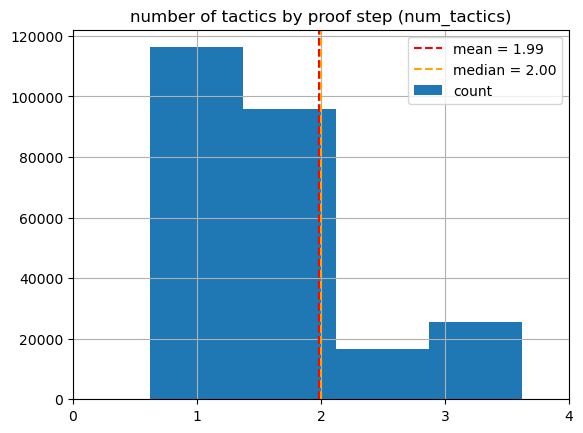

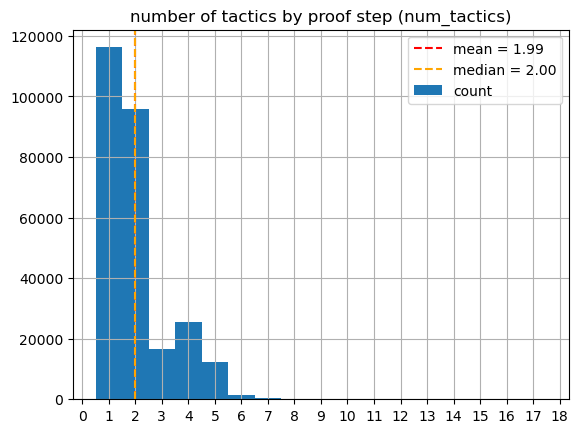

In [31]:
plot_hist_xticks(counts_by_pstep, 'num_tactics', 0.99, 'number of tactics by proof step', 'hist_num_tactics_by_proof_step_p99')
plot_hist_xticks(counts_by_pstep, 'num_tactics', 1.00, 'number of tactics by proof step', 'hist_num_tactics_by_proof_step_p100')

# Number of terms by proof step

In [32]:
import pickle

In [33]:
with open('../proof_step_stats.pkl', 'rb') as f:
    proof_step_stats = pickle.load(f)

In [34]:
proof_step_stats['n_terms'] = proof_step_stats['n_env'] + proof_step_stats['n_lc']
proof_step_stats.head()

,lib,n_env,n_goal,n_lc,project,proof,proof_tactic_str,step,n_terms
0,Bar.json,0,1,11,buchberger,subRelGRBar,unfold GRBar in |- *,0,11
1,Monomials.json,0,1,2,buchberger,pmon2,exact n_0,0,2
2,Monomials.json,0,1,2,buchberger,recomp_ok,elim m,0,2
3,Monomials.json,0,1,1,buchberger,zero_mon,exact n_0,0,1
4,Monomials.json,0,1,2,buchberger,mult_mon_zero_r,simpl in |- *,0,2


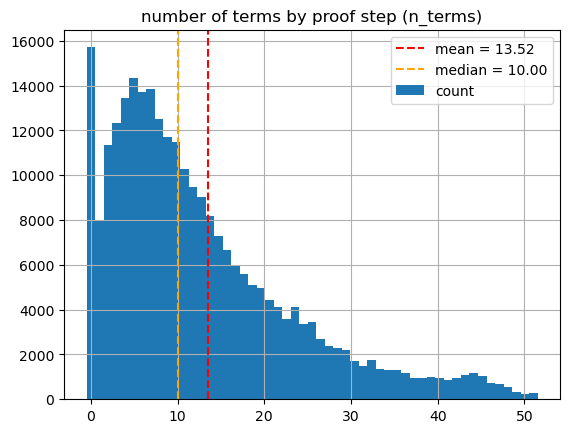

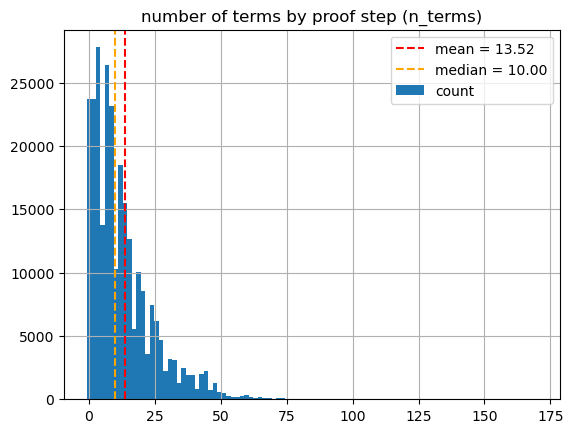

In [36]:
plot_hist_simple_title(proof_step_stats, 'n_terms', 0.99, 'number of terms by proof step', 'hist_num_terms_by_proof_step_p99')
plot_hist_simple_title(proof_step_stats, 'n_terms', 1.00, 'number of terms by proof step', 'hist_num_terms_by_proof_step_p100')